## **Custom Dataset로 Yolov8 재학습하여 객체 감지 예측하기**

**< 진행 절차 >**
1. Data 준비하기 : Custom Dataset Dataset으로 Yolov8 재학습(Fine Tuning)하는 경우에는 Image / Annotation 으로 이루어진 Dataset 준비
    - Roboflow에서 제공하는 Training Dataset을 이용하거나 Labeling Tool 을 이용하여 개발자가 직접 Labeling 시킨 Image / Annotation으로 이루어진 Training Dataset을 구축해야함
    - Custom Dataset 구축시 이미지 데이터와 정답데이터는 확장자를 제외한 파일 이름은 동일해야하며 Yolov8에서 annotation 파일 즉 정답 파일의 확장자는 반드시 .txt 여야 함

    1) Roboflow 에서 Aquarium Dataset (custom data) 다운로드
    - Colab 으로 데이터셋 업로드 : Roboflow(https://public.roboflow.com/)에서 제공하는 Dataset 로드하기
    2) yaml 파일 설정** (데이터셋 위치 알려주는 config file)
        2-1) roboflow 에서 제공되는 data.yaml 파일 확인
        2-2) custom data에 대한 yaml 파일 만들기
            Yolov8으로 Custom Data를 학습하기 위해서는 YAML 파일이 반드시 필요. YAML 파일에는 다음 정보를 포함해야함
            - 이미지와 정답이 저장되어 있는 디렉토리 정보
            - 인식하고 싶은 클래스 종류와 대응대는 각각의 이름
            - 형식 : 클래스번호 | x의 center 좌표|y의 center좌표| 너비 |높이  
                - 전체 이미지의 width 와 height 값으로 나눈 비율값임

2. ultralytics 패키지 설치하기
```python
pip install ultralytics
```
3. 모델 객체 선언하고 학습하기
```python
from ultralytics import YOLO
model = YOLO('yolov8n.pt')  #  model = YOLO('yolov8n-seg.pt')
model.train(data='mydata.yaml', epochs=10)
```
4. 객체 검출하기
```python
results = model.predict(source='/content/test/')
```
5. 결과 확인하기
6. 결과 다운로드하기
7. 학습된 모델 내보내기
8. 웹캠에서 모델 사용하여 객체 검출하기

## **1. 데이터 준비하기(Custom Data 구축)**
- Roboflow에서 제공하는 Training Dataset을 이용

### 1) Roboflow 에서 Aquarium Dataset (custom data) 다운로드
- Public Dataset : https://public.roboflow.com/object-detection/aquarium/2
- Download Dataset > Export - Select Format : Yolov8, show download code 선택 후  continue 버튼 클릭 > Your Download Code - Raw URL 탭에서 주조 복사하기

In [1]:
# Window 환경에서 사용
#!powershell Invoke-WebRequest -Uri https://public.roboflow.com/ds/7o8nkc5tC0?key=TflNDoBe5H -OutFile Aquarium_Data.zip
import requests

# 다운로드할 파일의 URL
url = 'https://public.roboflow.com/ds/7o8nkc5tC0?key=TflNDoBe5H'

# 요청을 보내고 응답을 받습니다.
r = requests.get(url, allow_redirects=True)

# 파일로 저장합니다.
open('Aquarium_Data.zip', 'wb').write(r.content)


70190866

In [2]:
import zipfile

with zipfile.ZipFile('./Aquarium_Data.zip') as target_file:
    target_file.extractall('./Aquarium_Data/')

## **2) yaml 파일 설정** (데이터셋 위치 알려주는 config file)
### 2-1) roboflow 에서 제공되는 data.yaml 파일 확인

In [3]:
!type .\Aquarium_Data\data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 7
names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

roboflow:
  workspace: brad-dwyer
  project: aquarium-combined
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/brad-dwyer/aquarium-combined/dataset/2


### 2-2) custom data에 대한 yaml 파일 만들기

In [4]:
# 파이썬에서 YAML 파일을 사용하기 위해 PyYAML 라이브러리 설치
!pip install PyYAML

In [5]:
import os
print(os.getcwd())

C:\Users\USER\Documents\vision-AI\0510_segmentation


In [6]:
# yaml 파일을 학습이 가능하도록 경로 설정.
# key-value 데이터인 dict 데이터타입으로 data['train'], data['val'], data['nc'], data['names'] 에 넣어주는데,
# 가장 중요한 부분은 데이터 경로 설정임.

import yaml
# 디렉토리 정보, 클래스 이름(names), 클래스 수(nc) 지정하기

# window - 절대경로 사용
data = {
    'train': 'C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/train/images',
    'val': 'C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/valid/images',
    'test': 'C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/test/images',

    'names': ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'],
    'nc': 7
}

# data = {
#     'train': './Aquarium_Data/train/images',
#     'val': './Aquarium_Data/valid/images',
#     'test': './Aquarium_Data/test/images',
#     'names': ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray'],
#     'nc': 7
# }

# 데이터 경로와 클래스 정보를 저장하고 있는 딕셔너리 객체 data를 YOLOv8 학습에 필요한 새로운 이름으로 저장
with open('./Aquarium_Data/Aquarium_Data.yaml', 'w') as f:
  yaml.dump(data, f)

# Aquarium_Data.yaml 읽어서 화면에 출력
with open('./Aquarium_Data/Aquarium_Data.yaml', 'r') as f:
  aquarium_yaml = yaml.safe_load(f)
  display(aquarium_yaml)

{'names': ['fish',
  'jellyfish',
  'penguin',
  'puffin',
  'shark',
  'starfish',
  'stingray'],
 'nc': 7,
 'test': 'C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/test/images',
 'train': 'C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/train/images',
 'val': 'C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/valid/images'}

In [7]:
!type .\Aquarium_Data\Aquarium_Data.yaml

names:
- fish
- jellyfish
- penguin
- puffin
- shark
- starfish
- stingray
nc: 7
test: C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/test/images
train: C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/train/images
val: C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/valid/images


## **2. yolov8 사용을 위한 패키지 설치 및 가져오기**
- https://github.com/ultralytics/ultralytics

In [8]:
# GPU를 지원하는 PyTorch 버전을 설치 - CUDA 12.1
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
#!conda install pytorch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 pytorch-cuda=12.1 -c pytorch -c nvidia

Looking in indexes: https://download.pytorch.org/whl/cu121


In [9]:
import torch

if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available.")

GPU is available: NVIDIA GeForce RTX 4060


In [10]:
# 패키지 버전 확인하기
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.11  Python-3.10.14 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
Setup complete  (24 CPUs, 31.7 GB RAM, 187.2/953.0 GB disk)


## **3.모델 객체 선언하고 학습하기**

### 1) 모델 객체 선언하기

In [11]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # 사전학습된 YOLOv8n detection model 로드하기.

In [12]:
# Yolov8은 MS COCO 데이터 사전학습되어있어 MS COCO Dataset에 정의된 클래스 개수오 ㅏ종류 확인할 수 있음(0~79)
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [13]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 4060


### 2) 모델 학습하기 (자신의 만든 yaml파일 지정)

1. **`data`**: 데이터셋 설정 파일의 로드. YAML 형식의 파일로, 훈련, 검증, 테스트 데이터 경로 및 클래스수
2. **`epochs`**: 훈련에 사용할 총 에포크 수
3. **`patience`**: 모델 학습 중 개선이 없을 때 학습을 중단하기 전에 기다리는 에포크 지정
4. **`batch`**: 각 훈련 스텝에서 처리할 이미수 있습니다.
5. **`imgsz`**: 입 이미(도를 정의합니다. 일반적으로 416, 512, 640) 이 사용됩니다.
6. **`optimizer`**: 사용할 (고리즘을 지정합니다. 일반적으로 `SGD`, `Adam`, `AdamW)은옵션을 사용합니다.
7. **`momentum`**: 모멘텀 지정
8. **`weight_decay`**: 가중치 감적합을 방지하는 데 사용됩니다.
9. **`warmup_epochs`**: 초기 학습률을높이기사퓨1의 코어 수에 따라 최적화하세요.
10. **`save` : 모델을 저장할지 여부를 결정합니다.


In [14]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [15]:
# 모델 학습하기 (자신의 만든 yaml파일 지정)
model.train(data='C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/Aquarium_Data.yaml', epochs=15, patience=3, batch=8, imgsz=416)

Ultralytics YOLOv8.2.11  Python-3.10.14 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data/Aquarium_Data.yaml, epochs=15, time=None, patience=3, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train23, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

C:\Users\USER\anaconda3\envs\torch-gpu\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed 


train: Scanning C:\Users\USER\Documents\vision-AI\0510_segmentation\Aquarium_Data\train\labels.cache... 448 images, 1 backgrounds, 0 corr
val: Scanning C:\Users\USER\Documents\vision-AI\0510_segmentation\Aquarium_Data\valid\labels.cache... 127 images, 0 backgrounds, 0 corrup


Plotting labels to runs\detect\train23\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs\detect\train23
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15     0.872G      1.699      3.808       1.28        126        416: 100%|██████████| 56/56 [00:05<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.31it/s]

                   all        127        909     0.0121      0.513       0.11     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15     0.872G      1.787      2.765       1.25        137        416: 100%|██████████| 56/56 [00:04<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.72it/s]

                   all        127        909      0.272      0.256      0.211      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15     0.875G       1.79      2.363      1.256        171        416: 100%|██████████| 56/56 [00:04<00:00, 12.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.43it/s]

                   all        127        909      0.321       0.33       0.26      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15     0.875G      1.755      2.146      1.253         51        416: 100%|██████████| 56/56 [00:04<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.73it/s]

                   all        127        909      0.391      0.342       0.33      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15     0.875G      1.733      1.967      1.238         58        416: 100%|██████████| 56/56 [00:04<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.74it/s]

                   all        127        909      0.413      0.461      0.394      0.212


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15     0.875G      1.597      1.955      1.193         79        416: 100%|██████████| 56/56 [00:05<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.57it/s]

                   all        127        909      0.465      0.442      0.402      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15     0.875G      1.584      1.859      1.191         53        416: 100%|██████████| 56/56 [00:04<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.62it/s]

                   all        127        909       0.45      0.463      0.433      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15     0.875G      1.548       1.81      1.184         44        416: 100%|██████████| 56/56 [00:04<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.89it/s]

                   all        127        909      0.557      0.509       0.48      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15     0.875G      1.552      1.728      1.161         99        416: 100%|██████████| 56/56 [00:04<00:00, 12.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.29it/s]

                   all        127        909      0.634      0.512      0.537      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15     0.875G      1.505      1.645      1.151        101        416: 100%|██████████| 56/56 [00:04<00:00, 13.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.53it/s]

                   all        127        909      0.636      0.517      0.554       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15     0.875G      1.481       1.57      1.131         40        416: 100%|██████████| 56/56 [00:04<00:00, 13.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.61it/s]

                   all        127        909      0.668      0.511      0.579      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15     0.875G      1.427      1.497      1.126         31        416: 100%|██████████| 56/56 [00:04<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.52it/s]

                   all        127        909      0.651      0.557        0.6      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15     0.875G      1.438      1.508      1.126         46        416: 100%|██████████| 56/56 [00:04<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.56it/s]

                   all        127        909      0.664      0.563      0.587      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15     0.875G      1.399      1.446      1.114         30        416: 100%|██████████| 56/56 [00:04<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.60it/s]

                   all        127        909      0.707      0.543      0.616      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15     0.875G      1.413      1.408      1.106         57        416: 100%|██████████| 56/56 [00:04<00:00, 13.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.67it/s]

                   all        127        909      0.739      0.558      0.626      0.346



15 epochs completed in 0.028 hours.
Optimizer stripped from runs\detect\train23\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train23\weights\best.pt, 6.2MB

Validating runs\detect\train23\weights\best.pt...
Ultralytics YOLOv8.2.11  Python-3.10.14 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.94it/s]


                   all        127        909      0.742      0.557      0.626      0.346
                  fish        127        459      0.787      0.556      0.694      0.343
             jellyfish        127        155      0.631      0.839      0.813      0.411
               penguin        127        104       0.63        0.5      0.593      0.229
                puffin        127         74      0.578      0.392      0.352      0.126
                 shark        127         57      0.725      0.456      0.517      0.285
              starfish        127         27      0.898      0.519      0.656      0.456
              stingray        127         33      0.942      0.636      0.753      0.571
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train23


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001FB181F5060>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

In [16]:
print(dir(model.metrics))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed', 'task']


In [17]:
# 커스텀 데이터로 학습하였기 때문에 클래수 수의 변경됨을 확인할 수 있음
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 7
{0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}


### ▲ train 과정중에 loss, accuracy 등의 graph 데이터는 runs/detect/train/ 에 있는 results.csv 와 results.png 통해서 확인가능함

### 3) 테스트 이미지 데이터 생성 및 확인

In [18]:
# # 테스트 이미지
# from glob import glob

# test_image_list = glob('C:/Users/iot00/Documents/AI/ObjectDetection/Aquarium_Data/test/images/*')
# test_image_list.sort()

# for i in range(len(test_image_list)):
#     print('i = ',i, test_image_list[i])

## **4.객체 검출 (Inference or predict)**

In [19]:
results = model.predict(source='C:/Users/USER/Documents/vision-AI/0510_segmentation/Aquarium_Data//test/images/', save=True)


image 1/63 C:\Users\USER\Documents\vision-AI\0510_segmentation\Aquarium_Data\test\images\IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 416x320 1 shark, 97.3ms
image 2/63 C:\Users\USER\Documents\vision-AI\0510_segmentation\Aquarium_Data\test\images\IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg: 416x320 22 penguins, 17.4ms
image 3/63 C:\Users\USER\Documents\vision-AI\0510_segmentation\Aquarium_Data\test\images\IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg: 416x320 7 penguins, 46.2ms
image 4/63 C:\Users\USER\Documents\vision-AI\0510_segmentation\Aquarium_Data\test\images\IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg: 416x320 3 penguins, 46.9ms
image 5/63 C:\Users\USER\Documents\vision-AI\0510_segmentation\Aquarium_Data\test\images\IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg: 416x320 5 penguins, 29.0ms
image 6/63 C:\Users\USER\Documents\vision-AI\0510_segmentation\Aquarium_Data\test\images\IMG_2371_jpeg_jpg.rf.54505f60b6706da1

## **5. 결과 확인하기**

In [20]:
print(type(results), len(results))

<class 'list'> 63


In [21]:
import numpy as np

for result in results:
    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True)  # Torch.Tensor -> numpy
    uniq_cnt_dict = dict(zip(uniq, cnt))

    print('\n{class num : counts} =', uniq_cnt_dict,'\n')

    for i, c in enumerate(result.boxes.cls):
        class_id = int(c)
        class_name = result.names[class_id]
        confidence_score = result.boxes.conf[i]  # 예측 확률
        print(f'class num: {class_id:>2} , class name: {class_name :<13}, confidence: {confidence_score:.2f}')


{class num : counts} = {4.0: 1} 

class num:  4 , class name: shark        , confidence: 0.45

{class num : counts} = {2.0: 22} 

class num:  2 , class name: penguin      , confidence: 0.92
class num:  2 , class name: penguin      , confidence: 0.76
class num:  2 , class name: penguin      , confidence: 0.70
class num:  2 , class name: penguin      , confidence: 0.61
class num:  2 , class name: penguin      , confidence: 0.55
class num:  2 , class name: penguin      , confidence: 0.54
class num:  2 , class name: penguin      , confidence: 0.48
class num:  2 , class name: penguin      , confidence: 0.48
class num:  2 , class name: penguin      , confidence: 0.45
class num:  2 , class name: penguin      , confidence: 0.42
class num:  2 , class name: penguin      , confidence: 0.39
class num:  2 , class name: penguin      , confidence: 0.39
class num:  2 , class name: penguin      , confidence: 0.38
class num:  2 , class name: penguin      , confidence: 0.37
class num:  2 , class name: p

In [23]:
# 테스트 이미지 모두 예측 결과 이미지로 나타내기
from PIL import Image
from IPython.display import display
import os

# 이미지가 저장된 폴더 경로
image_dir = './runs/detect/train42'

if(~os.path.isdir(image_dir)):
    os.mkdir(image_dir)
    
# 폴더 내의 모든 파일을 순회
for file_name in os.listdir(image_dir):
    file_path = os.path.join(image_dir, file_name)
    # 파일 확장자가 .jpg인 경우에만 처리
    if file_path.endswith('.jpg'):
        with Image.open(file_path) as img:
            display(img)

## CVAT 사용
- https://www.cvat.ai/ : Open Data
Annotation Platform

## **7.학습된 모델 내보내기**

In [41]:
# 모델을 내보내기
model.save('new_yolov8n.pt')

model = YOLO('new_yolov8n.pt')
print(model.names)  # 클래스 레이블을 확인합니다.

# 이미 불러온 모델의 가중치를 저장합니다.
model.save('custom_model_weights.pt')

# 저장된 모델 가중치 파일을 다시 로드합니다.
model_custom = YOLO('custom_model_weights.pt')

# 모델의 클래스 정보를 확인합니다.
print(model_custom.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

## 8. 테스트 이미지로 테스트 또는 웹캠 이용해 실시간 추론하기


image 1/1 C:\Users\USER\Documents\vision-AI\0510_segmentation\test_fish.jpg: 352x640 1 knife, 42.1ms
Speed: 3.0ms preprocess, 42.1ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs\detect\predict2
[[     20.824      50.132      288.36      114.92]]
Class: knife, Confidence: 0.310711145401001, Box: [     20.824      50.132      288.36      114.92]


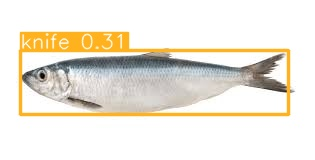

In [42]:
# 이미지에 대한 추론 수행
#results = model.predict('./test_fish.jpg')
results = model_custom.predict(source='./test_fish.jpg', save=True)
# print(results.pandas().xyxy[0])  # 추론 결과 출력

first_result = results[0]  # 첫 번째 이미지의 결과 가져오기

# numpy 배열로 변환된 박스 정보 추출
boxes = first_result.boxes  # bounding boxes
if boxes is not None:
    box_data = boxes.xyxy.cpu().numpy()  # xyxy 좌표로 변환
    print(box_data)

# 클래스 이름과 확률 정보를 함께 추출할 수도 있습니다.
names = first_result.names
for box, cls, conf in zip(box_data, boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy()):
    print(f"Class: {names[int(cls)]}, Confidence: {conf}, Box: {box}")


# 저장된 이미지 경로 지정
saved_image_path = 'runs/detect/predict/test_fish.jpg'
# 또는 IPython을 통한 시각화
from IPython.display import display, Image
display(Image(filename=saved_image_path))

In [43]:
import cv2
from ultralytics import YOLO
import numpy as np

# 학습된 모델을 로드합니다.
model_new = YOLO('new_yolov8n.pt')

# 웹캠 초기화
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 모델을 사용하여 프레임에서 객체 감지
    results = model_custom(frame)

    annotated_frame = frame  # 기본적으로 원본 프레임으로 초기화

    for result in results:
        try:
            # 예측 결과를 그리기
            annotated_frame = result.plot()
        except Exception as e:
            print(f"Error plotting results: {e}")

    # 화면에 표시
    cv2.imshow("YOLOv8 Real-Time Detection", annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 480x640 1 person, 71.4ms
Speed: 1.0ms preprocess, 71.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.5ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 3.0ms
Speed: 1.0ms preprocess, 3.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 3.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 10.8ms
Speed: 1.0ms preprocess, 10.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 5.0ms
Speed: 1.0ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 4.0ms
Speed: 1.0ms preprocess, 4.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0